In [7]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [6]:
df=pd.read_csv("/content/KEYACOSMET.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...  YCP   TRADE  VALUE (mn)     VOLUME
0  439 2018-05-08   KEYACOSMET   8.2  ...  8.4  1134.0      52.501  6379892.0
1  438 2018-06-08   KEYACOSMET   8.2  ...  8.2   438.0       9.864  1192124.0
2  437 2018-07-08   KEYACOSMET   8.3  ...  8.3   444.0      13.265  1611182.0
3  436 2018-08-08   KEYACOSMET   8.2  ...  8.2   622.0      18.938  2319027.0
4  435 2018-09-08   KEYACOSMET   8.1  ...  8.1   639.0      16.136  1986366.0

[5 rows x 12 columns]

In [8]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE  LTP*  ...  YCP   TRADE  VALUE (mn)     VOLUME
36  403 2018-01-10   KEYACOSMET   7.9  ...  7.8   490.0      19.591  2483829.0
59  380 2018-01-11   KEYACOSMET   7.4  ...  7.3   256.0      10.276  1393138.0
37  402 2018-02-10   KEYACOSMET   7.7  ...  7.8   312.0       7.353   940931.0
79  360 2018-02-12   KEYACOSMET   7.4  ...  7.1   575.0      18.945  2593386.0
16  423 2018-03-09   KEYACOSMET   8.4  ...  8.1  1165.0      53.939  6456482.0

[5 rows x 12 columns]

In [9]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [10]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [11]:
df['volatility'] = df['volatility']*100

In [12]:
import matplotlib.pyplot as plt 

In [13]:
df=df.reset_index()['volatility']

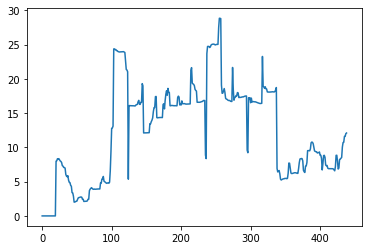

In [14]:
plt.plot(df)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [16]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:

X_test.shape


(31, 100, 1)

In [22]:


filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsKeyacosmet/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsKeyacosmet/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsKeyacosmet/model3.h5"


In [23]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 45ms/step - loss: 0.1547 - val_loss: 0.0055
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0579 - val_loss: 0.0159
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0298 - val_loss: 0.0076
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0191 - val_loss: 0.0110
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0169 - val_loss: 0.0141
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0112 - val_loss: 0.0180
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 0.0194
Epoch 8/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0077 - val_loss: 0.0375
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0103 - val_loss: 0.0169
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 11/100
7/7 [=

In [24]:
model1.save(filepath1)

In [25]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 7s 326ms/step - loss: 0.3051 - val_loss: 0.0254
Epoch 2/100
7/7 [==============================] - 1s 148ms/step - loss: 0.0557 - val_loss: 0.0058
Epoch 3/100
7/7 [==============================] - 1s 145ms/step - loss: 0.0341 - val_loss: 0.0112
Epoch 4/100
7/7 [==============================] - 1s 148ms/step - loss: 0.0194 - val_loss: 0.0336
Epoch 5/100
7/7 [==============================] - 1s 151ms/step - loss: 0.0239 - val_loss: 0.0165
Epoch 6/100
7/7 [==============================] - 1s 152ms/step - loss: 0.0221 - val_loss: 0.0244
Epoch 7/100
7/7 [==============================] - 1s 156ms/step - loss: 0.0206 - val_loss: 0.0298
Epoch 8/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0171 - val_loss: 0.0221
Epoch 9/100
7/7 [==============================] - 1s 152ms/step - loss: 0.0218 - val_loss: 0.0347
Epoch 10/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0169 - val_loss: 0.0258
Epoch 11/

In [26]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 321ms/step - loss: 0.2393 - val_loss: 0.0596
Epoch 2/100
7/7 [==============================] - 1s 149ms/step - loss: 0.0628 - val_loss: 0.0038
Epoch 3/100
7/7 [==============================] - 1s 150ms/step - loss: 0.0406 - val_loss: 0.0225
Epoch 4/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0251 - val_loss: 0.0274
Epoch 5/100
7/7 [==============================] - 1s 154ms/step - loss: 0.0236 - val_loss: 0.0171
Epoch 6/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0212 - val_loss: 0.0310
Epoch 7/100
7/7 [==============================] - 1s 150ms/step - loss: 0.0241 - val_loss: 0.0298
Epoch 8/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0203 - val_loss: 0.0218
Epoch 9/100
7/7 [==============================] - 1s 153ms/step - loss: 0.0194 - val_loss: 0.0407
Epoch 10/100
7/7 [==============================] - 1s 156ms/step - loss: 0.0194 - val_loss: 0.0284
Epoch 11/

In [27]:
model2.save(filepath2)

In [28]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 14s 621ms/step - loss: 0.2493 - val_loss: 0.1157
Epoch 2/100
7/7 [==============================] - 2s 261ms/step - loss: 0.0401 - val_loss: 0.0145
Epoch 3/100
7/7 [==============================] - 2s 253ms/step - loss: 0.0286 - val_loss: 0.0655
Epoch 4/100
7/7 [==============================] - 2s 254ms/step - loss: 0.0242 - val_loss: 0.0261
Epoch 5/100
7/7 [==============================] - 2s 254ms/step - loss: 0.0177 - val_loss: 0.0350
Epoch 6/100
7/7 [==============================] - 2s 255ms/step - loss: 0.0146 - val_loss: 0.0269
Epoch 7/100
7/7 [==============================] - 2s 256ms/step - loss: 0.0154 - val_loss: 0.0264
Epoch 8/100
7/7 [==============================] - 2s 271ms/step - loss: 0.0157 - val_loss: 0.0241
Epoch 9/100
7/7 [==============================] - 2s 259ms/step - loss: 0.0141 - val_loss: 0.0264
Epoch 10/100
7/7 [==============================] - 2s 253ms/step - loss: 0.0150 - val_loss: 0.0255
Epoch 11

In [29]:
model3.save(filepath3)

In [30]:
from keras.models import load_model

In [31]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsKeyacosmet/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [32]:
print(len(all_models))

3


In [33]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsKeyacosmet/model1.h5'
model = load_model(f1)


In [34]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [35]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [36]:

#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

7.834857250824991

In [37]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [38]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [39]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [40]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [41]:

#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat


In [42]:

#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name


In [43]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [44]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [45]:
stacked_model = define_stacked_model(all_models)

In [46]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [47]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [48]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.277095  , 0.2800908 , 0.2752548 ],
       [0.28923428, 0.26977134, 0.29451093],
       [0.2883798 , 0.2650393 , 0.2969897 ],
       [0.23581511, 0.31716   , 0.2122245 ],
       [0.221647  , 0.33007118, 0.189466  ],
       [0.23575103, 0.3110296 , 0.2144388 ],
       [0.24761695, 0.29554668, 0.23498373],
       [0.25441724, 0.28687656, 0.24647667],
       [0.2575577 , 0.28312021, 0.2515841 ],
       [0.25882578, 0.28204465, 0.2534573 ],
       [0.26297042, 0.27831683, 0.26004896],
       [0.27650002, 0.26543736, 0.2817234 ],
       [0.2820612 , 0.26130664, 0.29014787],
       [0.26690724, 0.2795499 , 0.2641941 ],
       [0.2770717 , 0.26985312, 0.28054935],
       [0.27992818, 0.26766378, 0.28486583],
       [0.28846326, 0.26461715, 0.2953714 ],
       [0.3023977 , 0.26722193, 0.30844203],
       [0.32253247, 0.259318  , 0.33517513],
       [0.34328052, 0.24048741, 0.36921245],
       [0.34361616, 0.23395237, 0.3742647 ],
       [0.2884086 , 0.28942135, 0.28471476],
       [0.

In [49]:
yhat=scaler.inverse_transform(yhat)

In [50]:
x, y, z = yhat.T

In [51]:
avg = (x+y+z)/3

In [52]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [53]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

1.2727234763880901

In [54]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

1.3093389663994042